In [1]:
pip install resampy

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
print(os.getcwd())

/content


In [4]:
data_path = '/content/drive/MyDrive/Voice-DST'
print(os.listdir(data_path))

['train', 'test', 'val']


In [5]:
filelist = os.listdir(data_path)

for filename in filelist:
  print(filename)

train
test
val


In [6]:
%matplotlib inline

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from tensorflow.keras.utils import to_categorical
#from sklearn.model_selection import train_test_split

In [7]:
from pickle import dump
from pickle import load

In [8]:
train_data = data_path+"/train"
os.listdir(train_data)

['a_00000137_5000.wav',
 'a_00000132_0.wav',
 'a_00000129_0.wav',
 'a_00000136_0.wav',
 'a_00000134_5000.wav',
 'a_00000131_0.wav',
 'a_00000134_0.wav',
 'a_00000136_5000.wav',
 'a_00000132_5000.wav',
 'a_00000110_0.wav',
 'a_00000118_5000.wav',
 'a_00000123_0.wav',
 'a_00000110_5000.wav',
 'a_00000120_5000.wav',
 'a_00000128_0.wav',
 'a_00000130_0.wav',
 'a_00000109_5000.wav',
 'a_00000121_0.wav',
 'a_00000113_0.wav',
 'a_00000128_5000.wav',
 'a_00000116_5000.wav',
 'a_00000114_5000.wav',
 'a_00000126_0.wav',
 'a_00000121_5000.wav',
 'a_00000117_0.wav',
 'a_00000119_5000.wav',
 'a_00000122_0.wav',
 'a_00000131_5000.wav',
 'a_00000118_0.wav',
 'a_00000119_0.wav',
 'a_00000135_0.wav',
 'a_00000127_5000.wav',
 'a_00000133_5000.wav',
 'a_00000127_0.wav',
 'a_00000102_0.wav',
 'a_00000108_5000.wav',
 'a_00000098_5000.wav',
 'a_00000108_0.wav',
 'a_00000090_5000.wav',
 'a_00000097_0.wav',
 'a_00000111_0.wav',
 'a_00000095_5000.wav',
 'a_00000096_0.wav',
 'a_00000092_5000.wav',
 'a_00000112_

In [9]:
val_data = data_path+"/val"
os.listdir(val_data)

['a_00000123_5000.wav',
 'a_00000079_0.wav',
 'a_00000100_5000.wav',
 'a_00000064_5000.wav',
 'a_00000117_5000.wav',
 'a_00000088_0.wav',
 'a_00000102_5000.wav',
 'a_00000062_0.wav',
 'a_00000082_0.wav',
 'a_00000115_5000.wav',
 'a_00000125_0.wav',
 'a_00000093_5000.wav',
 'a_00000114_0.wav',
 'a_00000045_0.wav',
 'a_00000096_5000.wav',
 'a_00000106_5000.wav',
 'a_00000130_5000.wav',
 'a_00000104_5000.wav',
 'a_00000129_5000.wav',
 'a_00000053_0.wav',
 'a_00000120_0.wav',
 'a_00000058_0.wav',
 'a_00000074_5000.wav',
 'a_00000072_0.wav',
 'a_00000012_0.wav',
 'a_00000032_5000.wav',
 'a_00000063_0.wav',
 'n_00000371_5000.wav',
 'n_00000370_0.wav',
 'n_00000368_5000.wav',
 'a_00000035_5000.wav',
 'a_00000047_5000.wav',
 'a_00000041_5000.wav',
 'a_00000013_5000.wav',
 'a_00000031_0.wav',
 'a_00000010_0.wav',
 'a_00000042_5000.wav',
 'a_00000036_0.wav',
 'a_00000007_0.wav',
 'a_00000016_0.wav',
 'a_00000024_0.wav',
 'a_00000003_0.wav',
 'n_00000372_5000.wav',
 'n_00000366_5000.wav',
 'a_000

In [10]:
test_data = data_path+"/test"
os.listdir(test_data)

['a_00000091_0.wav',
 'a_00000105_0.wav',
 'a_00000080_0.wav',
 'a_00000101_0.wav',
 'a_00000124_5000.wav',
 'a_00000099_0.wav',
 'a_00000125_5000.wav',
 'a_00000088_5000.wav',
 'a_00000098_0.wav',
 'a_00000085_5000.wav',
 'a_00000100_0.wav',
 'a_00000075_0.wav',
 'a_00000090_0.wav',
 'a_00000066_0.wav',
 'a_00000137_0.wav',
 'a_00000087_0.wav',
 'a_00000133_0.wav',
 'a_00000094_5000.wav',
 'a_00000099_5000.wav',
 'a_00000126_5000.wav',
 'a_00000057_5000.wav',
 'a_00000078_5000.wav',
 'a_00000068_0.wav',
 'a_00000122_5000.wav',
 'a_00000053_5000.wav',
 'a_00000035_0.wav',
 'a_00000124_0.wav',
 'a_00000011_5000.wav',
 'a_00000019_0.wav',
 'a_00000067_5000.wav',
 'a_00000065_0.wav',
 'a_00000073_0.wav',
 'a_00000033_0.wav',
 'a_00000023_5000.wav',
 'a_00000020_0.wav',
 'a_00000052_0.wav',
 'a_00000077_0.wav',
 'a_00000027_5000.wav',
 'a_00000025_5000.wav',
 'a_00000076_0.wav',
 'a_00000026_5000.wav',
 'a_00000028_0.wav',
 'a_00000027_0.wav',
 'a_00000038_0.wav',
 'a_00000083_0.wav',
 'n_

In [11]:
normal_train = train_data+"/n_*.wav"
abnormal_train = train_data+"/a_*.wav"

In [12]:
normal_train

'/content/drive/MyDrive/Voice-DST/train/n_*.wav'

In [13]:
normal_val = val_data+"/n_*.wav"
abnormal_val = val_data+"/a_*.wav"

In [14]:
import librosa
import librosa.display

In [15]:
import glob

normal_train_signals = [
    librosa.load(p)[0] for p in glob.glob(normal_train)
]

abnormal_train_signals = [
    librosa.load(p)[0] for p in glob.glob(abnormal_train)
]

normal_val_signals = [
    librosa.load(p)[0] for p in glob.glob(normal_val)
]

abnormal_val_signals = [
    librosa.load(p)[0] for p in glob.glob(abnormal_val)
]

In [16]:
print("Shape of normal_train_signals:", np.array(normal_train_signals, dtype=object).shape)
print("Shape of abnormal_train_signals:", np.array(abnormal_train_signals, dtype=object).shape)
print("Shape of normal_val_signals:", np.array(normal_val_signals, dtype=object).shape)
print("Shape of abnormal_val_signals:", np.array(abnormal_val_signals, dtype=object).shape)

Shape of normal_train_signals: (489, 110250)
Shape of abnormal_train_signals: (175, 110250)
Shape of normal_val_signals: (119, 110250)
Shape of abnormal_val_signals: (47, 110250)


In [17]:
def save_dataset(dataset, filename):
    dump(dataset, open(filename, 'wb'))
    print('Saved: %s' % filename)

In [18]:
datasetFile = 'coffee_train.pkl'
save_dataset([normal_train_signals, abnormal_train_signals], datasetFile)

Saved: coffee_train.pkl


In [19]:
datasetFile_val = 'coffee_val.pkl'
save_dataset([normal_val_signals, abnormal_val_signals], datasetFile_val)

Saved: coffee_val.pkl


In [20]:
def load_dataset(filename):
    return load(open(filename, 'rb'))

[normal_train_signals, abnormal_train_signals] = load_dataset(datasetFile)

In [21]:
len(normal_train_signals), len(abnormal_train_signals)

(489, 175)

In [22]:
[normal_val_signals, abnormal_val_signals] = load_dataset(datasetFile_val)

In [23]:
len(normal_val_signals), len(abnormal_val_signals)

(119, 47)

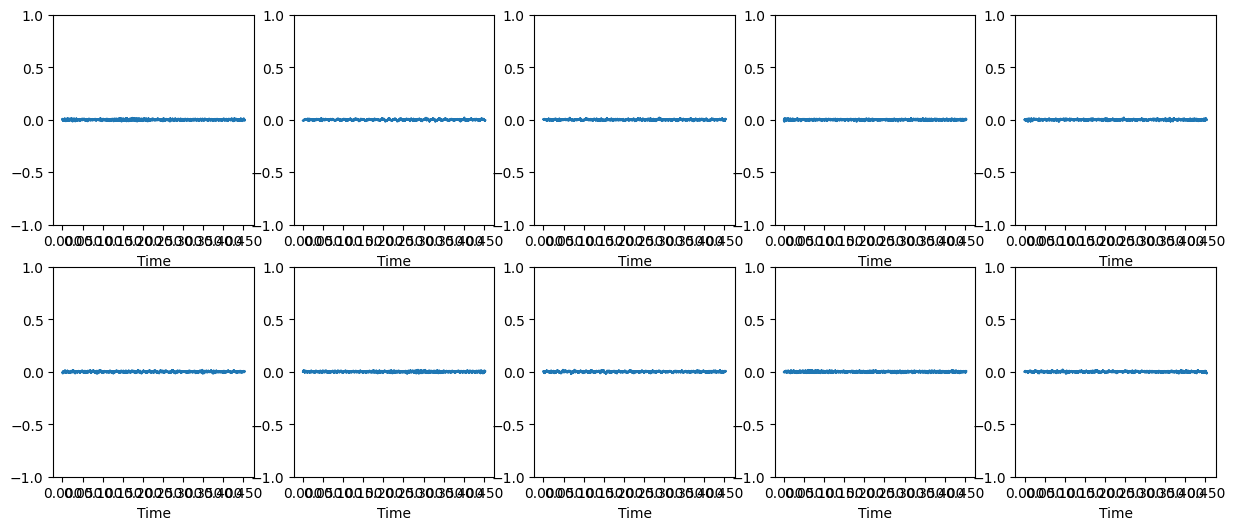

In [24]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(normal_train_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveshow(x[:10000])
    plt.ylim(-1, 1)

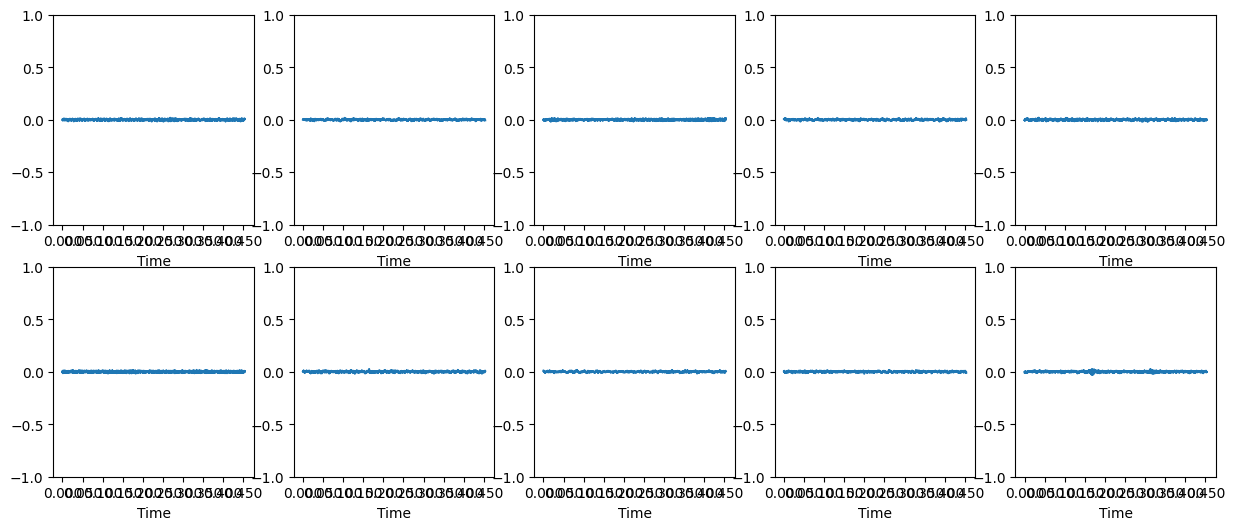

In [25]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(abnormal_train_signals[:10]):
    plt.subplot(2, 5, i+1)
    librosa.display.waveshow(x[:10000])
    plt.ylim(-1, 1)

In [26]:
def extract_features(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0, 0],
        librosa.feature.spectral_centroid(y=signal)[0, 0],
    ]

In [27]:
normal_train_features = np.array([extract_features(x) for x in normal_train_signals])
abnormal_train_features = np.array([extract_features(x) for x in abnormal_train_signals])

In [28]:
normal_val_features = np.array([extract_features(x) for x in normal_val_signals])
abnormal_val_features = np.array([extract_features(x) for x in abnormal_val_signals])

In [29]:
print(normal_train_features.shape)
print(abnormal_train_features.shape)
print(normal_val_features.shape)
print(abnormal_val_features.shape)

(489, 2)
(175, 2)
(119, 2)
(47, 2)


In [30]:
print(normal_train_features[10])
print(abnormal_train_features[10])
print(normal_val_features[10])
print(abnormal_val_features[10])

[2.34375000e-02 1.32516687e+03]
[4.29687500e-02 1.62944587e+03]
[4.93164062e-02 1.76634437e+03]
[5.46875000e-02 1.75624658e+03]


Text(0, 0.5, 'Count')

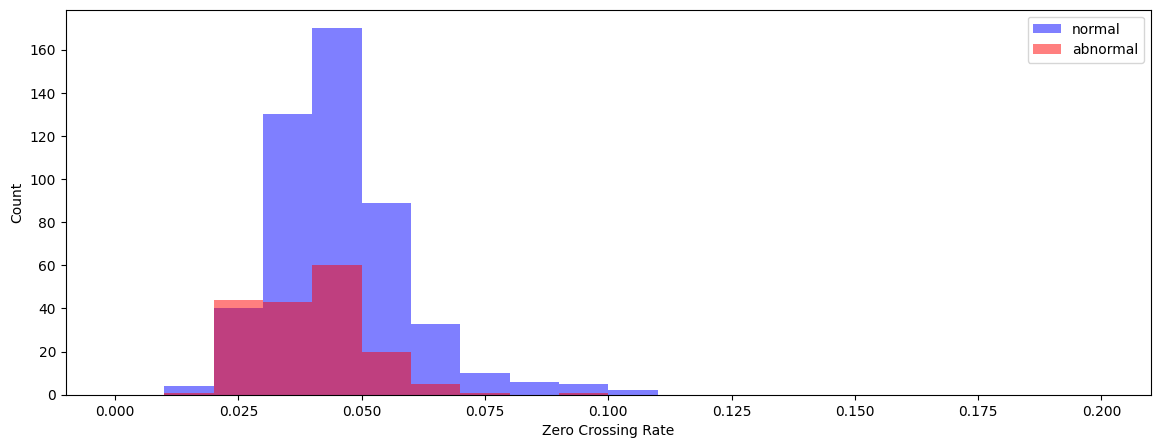

In [31]:
plt.figure(figsize=(14, 5))
plt.hist(normal_train_features[:,0], color='b', range=(0, 0.2), alpha=0.5, bins=20)
plt.hist(abnormal_train_features[:,0], color='r', range=(0, 0.2), alpha=0.5, bins=20)
plt.legend(('normal', 'abnormal'))
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

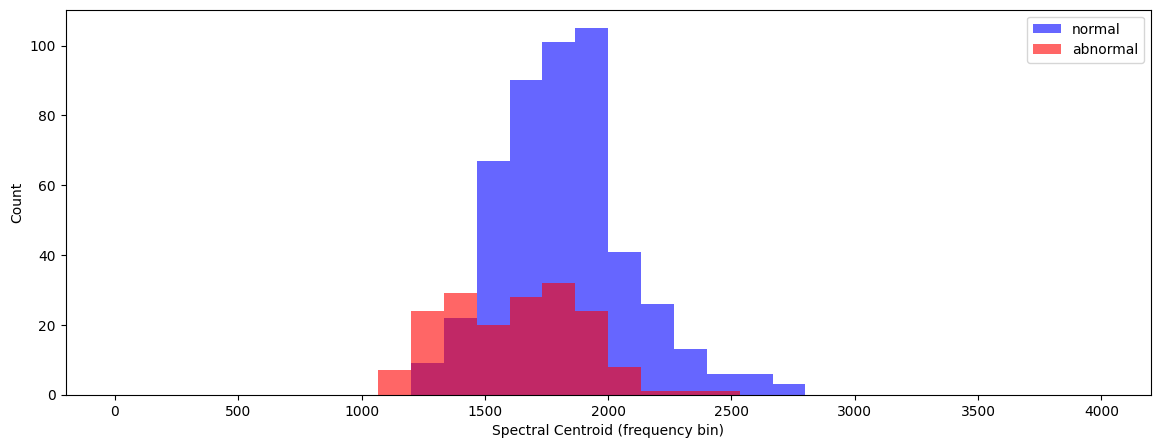

In [32]:
plt.figure(figsize=(14, 5))
plt.hist(normal_train_features[:,1], color='b', range=(0, 4000), bins=30, alpha=0.6)
plt.hist(abnormal_train_features[:,1], color='r', range=(0, 4000), bins=30, alpha=0.6)
plt.legend(('normal', 'abnormal'))
plt.xlabel('Spectral Centroid (frequency bin)')
plt.ylabel('Count')

In [33]:
feature_train_table = np.vstack((normal_train_features, abnormal_train_features))
print(feature_train_table.shape)

(664, 2)


In [34]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))
print(feature_val_table.shape)

(166, 2)


In [35]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
training_features = scaler.fit_transform(feature_train_table)
print(training_features.min(axis=0))
print(training_features.max(axis=0))

[-1. -1.]
[1. 1.]


In [36]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
val_features = scaler.fit_transform(feature_val_table)
print(val_features.min(axis=0))
print(val_features.max(axis=0))

[-1. -1.]
[1. 1.]


Text(0, 0.5, 'Spectral Centroid')

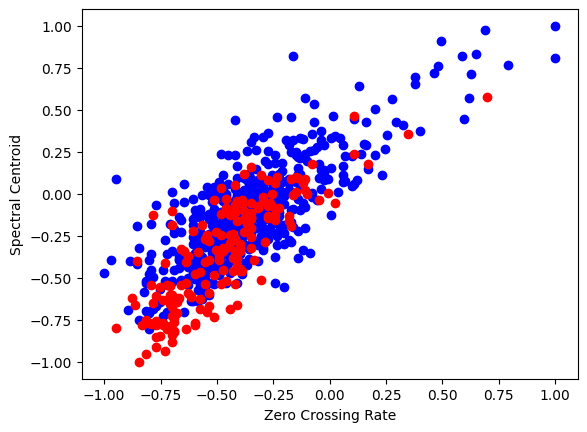

In [37]:
plt.scatter(training_features[:489,0], training_features[:489,1], c='b')
plt.scatter(training_features[489:,0], training_features[489:,1], c='r')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')

In [38]:
y_train_total = [0 for i in range(489)] + [1 for i in range(175)]
y_val_total = [0 for i in range(119)] + [1 for i in range(47)]

In [39]:
y_train_encoded = to_categorical(y_train_total)
y_val_encoded = to_categorical(y_val_total)

In [40]:
y_train_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [41]:
x_train = training_features
y_train = y_train_encoded
x_val = val_features
y_val = y_val_encoded

In [42]:
x_train.shape, y_train.shape

((664, 2), (664, 2))

In [43]:
x_val.shape, y_val.shape

((166, 2), (166, 2))

In [44]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input

In [45]:
def create_model():
    model = Sequential()
    model.add(Input(shape=(2,)))
    model.add(Dense(8))
    model.add(LeakyReLU(negative_slope=0.1))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='softmax'))
    return model

In [46]:
model = create_model()
model.summary()
adam_optim = Adam(learning_rate=0.0001)
model.compile(optimizer=adam_optim, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42 (168.00 B)

 Trainable params: 42 (168.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
his = model.fit(
    x_train,
    y_train,
    batch_size=1,
    epochs=100,
    verbose=1,
    validation_data = (x_val, y_val)
)

Epoch 1/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5871 - loss: 0.6645 - val_accuracy: 0.7289 - val_loss: 0.6075
Epoch 2/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6690 - loss: 0.6156 - val_accuracy: 0.7470 - val_loss: 0.5828
Epoch 3/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7174 - loss: 0.6101 - val_accuracy: 0.7289 - val_loss: 0.5692
Epoch 4/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7501 - loss: 0.5753 - val_accuracy: 0.7289 - val_loss: 0.5632
Epoch 5/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7495 - loss: 0.5657 - val_accuracy: 0.7169 - val_loss: 0.5610
Epoch 6/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7334 - loss: 0.5763 - val_accuracy: 0.7169 - val_loss: 0.5601
Epoch 7/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7421 - loss: 0.5600 - val_accuracy: 0.7169 - val_loss: 0.5600
Epoch 8/100
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7505 - loss: 0.5417 - val_accu

In [48]:
import plotly
import plotly.graph_objs as go

In [49]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title='', range=[0, 1]))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [50]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title='',range=[0, 1]))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

# **CNN Model**

In [51]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [52]:
file_name = '/content/drive/MyDrive/Voice-DST/train/a_00000013_0.wav'
audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')

print(audio.shape, sample_rate)

mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(110250,) 22050
(40, 216)


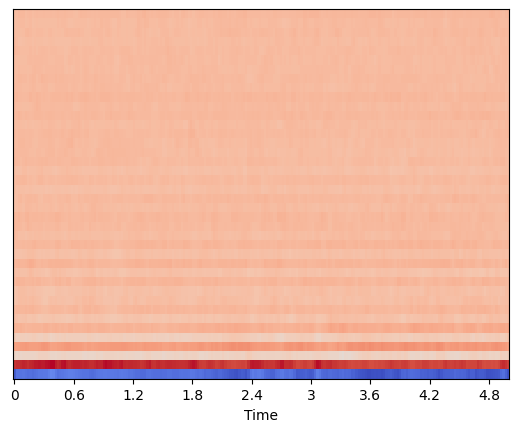

In [53]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

In [54]:
max_pad_len = 100

def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    pad_width = max_pad_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, max(0, pad_width))), mode='constant')
    return mfccs

In [55]:
normal_train_features = []
for file_name in glob.glob(normal_train):
    data = extract_features(file_name)
    normal_train_features.append(data)

abnormal_train_features = []
for file_name in glob.glob(abnormal_train):
    data = extract_features(file_name)
    abnormal_train_features.append(data)

normal_val_features = []
for file_name in glob.glob(normal_val):
    data = extract_features(file_name)
    normal_val_features.append(data)

abnormal_val_features = []
for file_name in glob.glob(abnormal_val):
    data = extract_features(file_name)
    abnormal_val_features.append(data)

In [56]:
normal_train_features[0].shape

(40, 216)

In [57]:
feature_train_table = np.vstack((normal_train_features, abnormal_train_features))
print(feature_train_table.shape)

(664, 40, 216)


In [58]:
feature_train_table = feature_train_table.reshape(feature_train_table.shape[0], feature_train_table.shape[1], feature_train_table.shape[2], 1)
print(feature_train_table.shape)

(664, 40, 216, 1)


In [59]:
y_train_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [60]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))

In [61]:
feature_val_table = feature_val_table.reshape(feature_val_table.shape[0], feature_val_table.shape[1], feature_val_table.shape[2], 1)
print(feature_val_table.shape)

(166, 40, 216, 1)


In [62]:
x_train = feature_train_table
x_val = feature_val_table
y_train = y_train_encoded
y_val = y_val_encoded

In [63]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((664, 40, 216, 1), (166, 40, 216, 1), (664, 2), (166, 2))

In [64]:
num_rows = 40
num_columns = 216
num_channels = 1
num_batch_size = 64
epochs = 50

In [65]:
model = Sequential()
model.add(Input(shape=(num_rows, num_columns, num_channels)))
model.add(Conv2D(filters=16, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(2, activation='softmax'))

In [66]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [67]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [68]:
his = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=1, callbacks=[checkpoint])

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.6193 - loss: 4.3085
Epoch 1: val_loss improved from inf to 0.47745, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 415ms/step - accuracy: 0.6199 - loss: 4.1715 - val_accuracy: 0.7771 - val_loss: 0.4775
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.6184 - loss: 1.1577
Epoch 2: val_loss did not improve from 0.47745
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 359ms/step - accuracy: 0.6211 - loss: 1.1521 - val_accuracy: 0.7169 - val_loss: 0.8433
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.7681 - loss: 0.7423
Epoch 3: val_loss did not improve from 0.47745
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 402ms/step - accuracy: 0.7659 - loss: 0.7466 - val_accuracy: 0.7530 - val_loss: 0.5206
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.7803 - loss: 0.5496
Epoch 4: val_loss did not improve from 0.47745
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 314ms/step - accuracy: 0.7817 - loss: 0.5488 - val_ac

In [69]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [70]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

In [71]:
from tensorflow import keras

model = keras.models.load_model("/content/best_model.keras")

In [72]:
train_res = model.evaluate(x_train, y_train, verbose=0, return_dict=True)
val_res   = model.evaluate(x_val,   y_val,   verbose=0, return_dict=True)

acc_key = next(k for k in train_res.keys() if k in
               ('accuracy', 'binary_accuracy', 'categorical_accuracy',
                'sparse_categorical_accuracy'))

print(f"Training  - loss: {train_res['loss']:.4f}, acc: {train_res[acc_key]:.4f}")
print(f"Validation- loss: {val_res['loss']:.4f}, acc: {val_res[acc_key]:.4f}")


Training  - loss: 0.1757, acc: 0.9337
Validation- loss: 0.1998, acc: 0.9337


In [73]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [74]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[119   0]
 [ 11  36]]


In [75]:
report = classification_report(y_true_classes, y_pred_classes, target_names=['normal', 'abnormal'],digits=4)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      normal     0.9154    1.0000    0.9558       119
    abnormal     1.0000    0.7660    0.8675        47

    accuracy                         0.9337       166
   macro avg     0.9577    0.8830    0.9116       166
weighted avg     0.9393    0.9337    0.9308       166



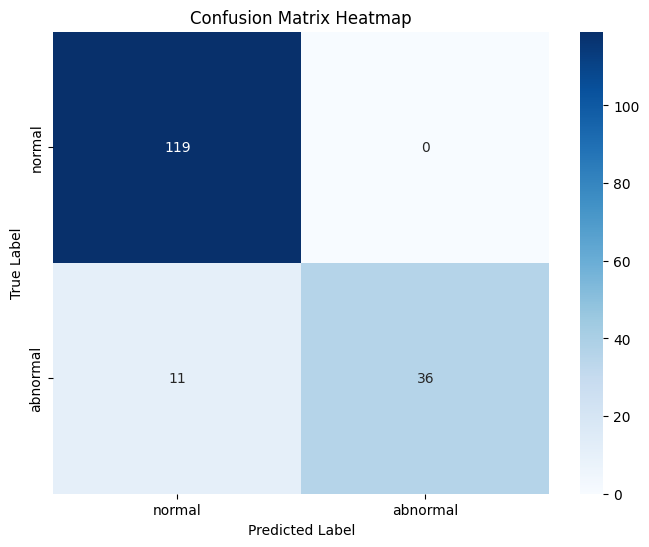

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['normal', 'abnormal'], yticklabels=['normal', 'abnormal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

## Test

In [77]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [78]:
file_name = '/content/drive/MyDrive/Voice-DST/test/a_00000003_5000.wav'
audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')

print(audio.shape, sample_rate)

mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(110250,) 22050
(40, 216)


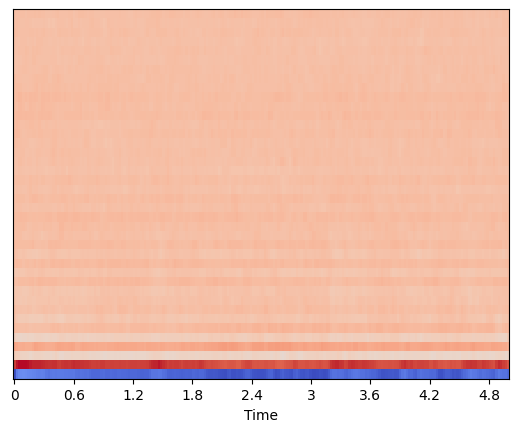

In [79]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

In [82]:
max_pad_len = 100

def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    pad_width = max_pad_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, max(0, pad_width))), mode='constant')
    return mfccs

In [83]:
normal_test = test_data + "/n_*.wav"
abnormal_test = test_data + "/a_*.wav"

In [84]:
normal_test_features = []
for file_name in glob.glob(normal_test):
    data = extract_features(file_name)
    normal_test_features.append(data)

abnormal_test_features = []
for file_name in glob.glob(abnormal_test):
    data = extract_features(file_name)
    abnormal_test_features.append(data)

normal_val_features = []
for file_name in glob.glob(normal_val):
    data = extract_features(file_name)
    normal_val_features.append(data)

abnormal_val_features = []
for file_name in glob.glob(abnormal_val):
    data = extract_features(file_name)
    abnormal_val_features.append(data)

In [85]:
normal_train_features[0].shape

(40, 216)

In [88]:
feature_test_table = np.vstack((normal_test_features, abnormal_test_features))
print(feature_test_table.shape)

(208, 40, 216)


In [89]:
feature_test_table = feature_test_table.reshape(feature_test_table.shape[0], feature_test_table.shape[1], feature_test_table.shape[2], 1)
print(feature_test_table.shape)

(208, 40, 216, 1)


In [90]:
x_test = np.array(normal_test_features + abnormal_test_features)
y_test = np.array([0] * len(normal_test_features) + [1] * len(abnormal_test_features))
x_val = np.array(normal_val_features + abnormal_val_features)
y_val = np.array([0] * len(normal_val_features) + [1] * len(abnormal_val_features))

In [91]:
from tensorflow.keras.utils import to_categorical
y_test_encoded = to_categorical(y_test, num_classes=2)
y_val_encoded = to_categorical(y_val, num_classes=2)

In [92]:
y_test_encoded[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [93]:
feature_val_table = np.vstack((normal_val_features, abnormal_val_features))

In [94]:
feature_val_table = feature_val_table.reshape(feature_val_table.shape[0], feature_val_table.shape[1], feature_val_table.shape[2], 1)
print(feature_val_table.shape)

(166, 40, 216, 1)


In [95]:
x_test = feature_test_table
x_val = feature_val_table
y_test = y_test_encoded
y_val = y_val_encoded

In [96]:
x_test.shape, x_val.shape, y_test.shape, y_val.shape

((208, 40, 216, 1), (166, 40, 216, 1), (208, 2), (166, 2))

In [97]:
num_rows = 40
num_columns = 216
num_channels = 1
num_batch_size = 64
epochs = 50

In [98]:
model = Sequential()
model.add(Input(shape=(num_rows, num_columns, num_channels)))
model.add(Conv2D(filters=16, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(2, activation='softmax'))

In [99]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [100]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [101]:
his = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose=1, callbacks=[checkpoint])

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.6392 - loss: 8.0902
Epoch 1: val_loss improved from inf to 1.11531, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 358ms/step - accuracy: 0.6420 - loss: 8.1207 - val_accuracy: 0.7169 - val_loss: 1.1153
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.5483 - loss: 2.4762
Epoch 2: val_loss improved from 1.11531 to 1.07016, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 329ms/step - accuracy: 0.5505 - loss: 2.4578 - val_accuracy: 0.7169 - val_loss: 1.0702
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 619ms/step - accuracy: 0.6893 - loss: 1.8267
Epoch 3: val_loss improved from 1.07016 to 0.47829, saving model to best_model.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 658ms/step - accuracy: 0.6855 - loss: 1.7865 - val_accuracy: 0.8012 - val_loss: 0.4783
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 0.7637 - loss: 0.7304
Epoch 4: val_loss improved from 0.47829 to 0.46651, sa

In [102]:
h1 = go.Scatter(y=his.history['loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=his.history['val_loss'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [103]:
h1 = go.Scatter(y=his.history['accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=his.history['val_accuracy'],
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig2 = go.Figure(data = data, layout=layout1)
fig2.show()

In [104]:
from tensorflow import keras

model = keras.models.load_model("/content/best_model.keras")

In [105]:
test_res = model.evaluate(x_test, y_test, verbose=0, return_dict=True)
val_res  = model.evaluate(x_val,   y_val, verbose=0, return_dict=True)

acc_key = next(k for k in test_res.keys() if k in
               ('accuracy', 'binary_accuracy', 'categorical_accuracy',
                'sparse_categorical_accuracy'))

print(f"Testing    - loss: {test_res['loss']:.4f}, acc: {test_res[acc_key]:.4f}")
print(f"Validation - loss: {val_res['loss']:.4f}, acc: {val_res[acc_key]:.4f}")


Testing    - loss: 0.2047, acc: 0.9375
Validation - loss: 0.2465, acc: 0.9157


In [106]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [107]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[117   2]
 [ 12  35]]


In [108]:
report = classification_report(y_true_classes, y_pred_classes, target_names=['normal', 'abnormal'],digits=4)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      normal     0.9070    0.9832    0.9435       119
    abnormal     0.9459    0.7447    0.8333        47

    accuracy                         0.9157       166
   macro avg     0.9265    0.8639    0.8884       166
weighted avg     0.9180    0.9157    0.9123       166



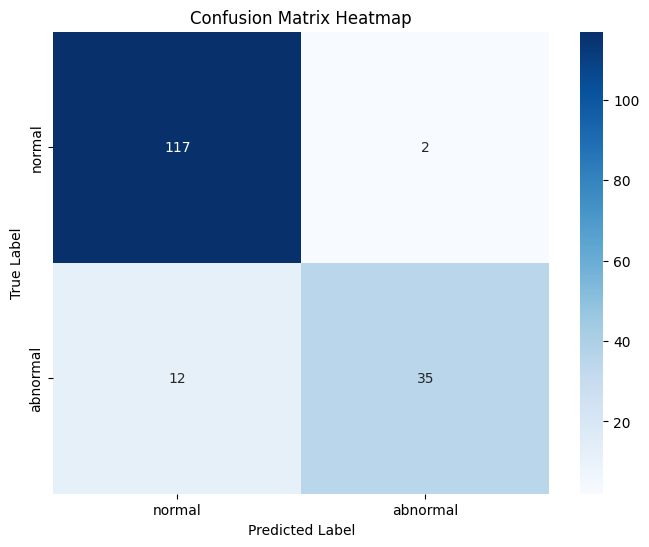

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['normal', 'abnormal'], yticklabels=['normal', 'abnormal'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()